### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Мерич Дорук Каймакджыоглу
##### Группа: НКНбд-01-20

## Москва 2023
***

### Вариант № 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1.	Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.

In [2]:
a = 'features/density'
b = 'features/chlorides'
c = 'quality'
name = 'wine_quality'
n = 7

In [3]:
ds = tfds.load(name, split='train')
data = tfds.as_dataframe(ds)
df = data[[a,b,c]]
df.head()

,features/density,features/chlorides,quality
0,1.00080,0.054,5
1,0.99110,0.063,6
2,0.99076,0.029,4
3,0.99672,0.110,6
4,0.99016,0.035,6


2.	Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

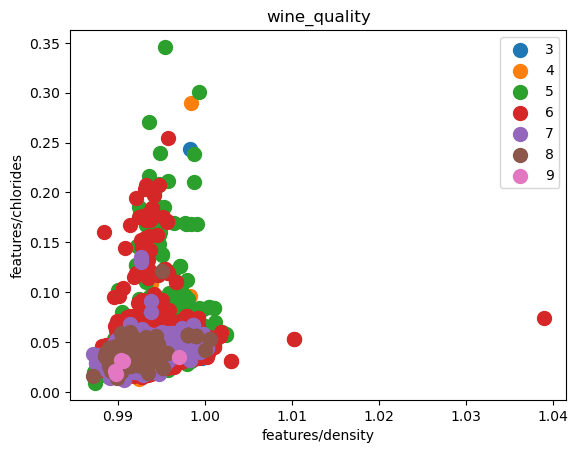

In [4]:
fig = plt.figure()
for i in (np.unique(df[c])):
    row_ix = np.where(df[c].values == i)
    plt.scatter(df.values[row_ix, 0], df.values[row_ix, 1], s=100,label=i )
plt.xlabel(a)
plt.ylabel(b)
plt.title(name)
plt.legend()
plt.show()

3.	Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек. 

In [5]:
df[c].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [6]:
df[c] = df[c].apply(lambda x:1 if x in [8,6] else 0)
df[c].value_counts()

0    2525
1    2373
Name: quality, dtype: int64

4.	Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(c,axis=1).values, df[c].astype(int).values, test_size=0.2, random_state=42)

In [8]:
from tensorflow import keras

feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)

model = tf.keras.Sequential([feature_normalizer
                             ,tf.keras.layers.Dense(2**n, activation='relu'),
                             tf.keras.layers.Dense(2**n, activation='relu'),
                             tf.keras.layers.Dense(2**n, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss=tf.keras.losses.binary_crossentropy)
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
123/123 [==============================] - 3s 4ms/step - loss: 0.6939
Epoch 2/100
123/123 [==============================] - 0s 4ms/step - loss: 0.6935
Epoch 3/100
123/123 [==============================] - 1s 5ms/step - loss: 0.6935
Epoch 4/100
123/123 [==============================] - 0s 4ms/step - loss: 0.6930
Epoch 5/100
123/123 [==============================] - 1s 4ms/step - loss: 0.6934
Epoch 6/100
123/123 [==============================] - 0s 4ms/step - loss: 0.6931
Epoch 7/100
123/123 [==============================] - 0s 4ms/step - loss: 0.6931
Epoch 8/100
123/123 [==============================] - 0s 4ms/step - loss: 0.6933
Epoch 9/100
123/123 [==============================] - 0s 4ms/step - loss: 0.6931
Epoch 10/100
123/123 [==============================] - 1s 4ms/step - loss: 0.6930
Epoch 11/100
123/123 [==============================] - 1s 5ms/step - loss: 0.6930
Epoch 12/100
123/123 [==============================] - 1s 4ms/step - loss: 0.6931
Epoch 13/100


123/123 [==============================] - 0s 3ms/step - loss: 0.6929
Epoch 100/100
123/123 [==============================] - 1s 5ms/step - loss: 0.6921


In [9]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TP(y_true, y_predict), FN(y_true, y_predict)],
        [FP(y_true, y_predict), TN(y_true, y_predict)]])

In [10]:
y_pred = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(model.predict(X_test))])
confusion_matrix(y_test,y_pred)

31/31 [==============================] - 0s 3ms/step


array([[257, 206],
       [219, 298]])

5.	Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.

9600/9600 [==============================] - 23s 2ms/step


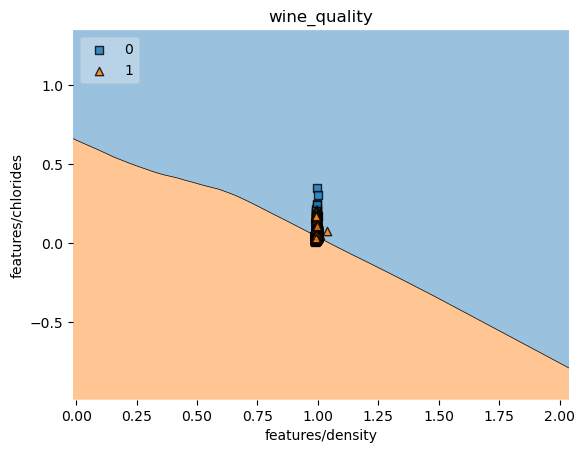

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.xlabel(a)
plt.ylabel(b)
plt.title(name)
plt.show()

9600/9600 [==============================] - 24s 2ms/step


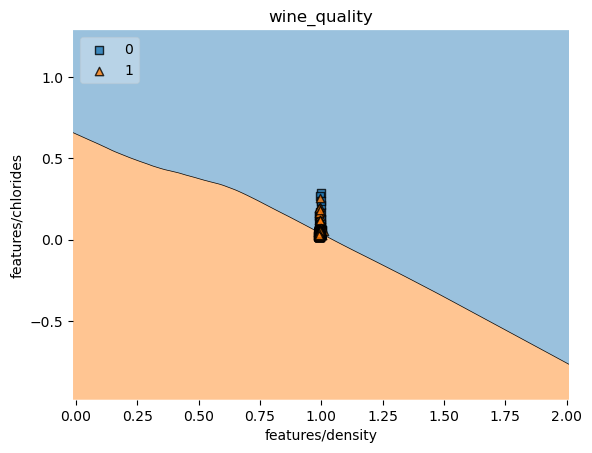

In [12]:
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.xlabel(a)
plt.ylabel(b)
plt.title(name)
plt.show()

6.	Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.

31/31 [==============================] - 0s 2ms/step


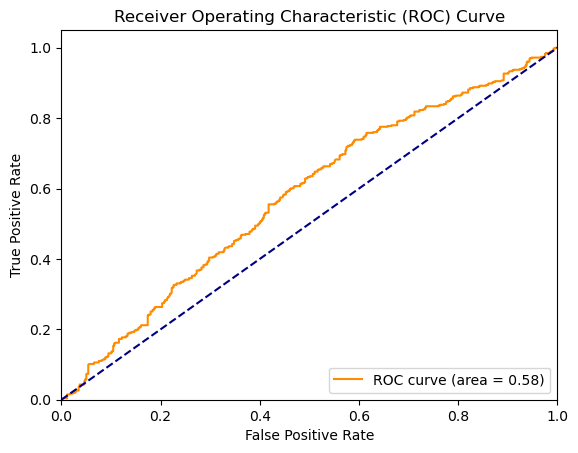

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Предсказание вероятностей класса на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление значения ROC-кривой и ее площади под кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

7.	Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети. 

In [14]:
data.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [15]:
X_train=data

In [16]:
X_train[c].unique()

array([5, 6, 4, 8, 7, 3, 9])

In [17]:
X_train[c] = X_train[c].apply(lambda x:1 if x in [1,2,3] else 0)
X_train[c].value_counts()

0    4878
1      20
Name: quality, dtype: int64

In [18]:
y_train = X_train[c]
X_train=X_train.drop(c,axis=1)

In [19]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)
model = keras.Sequential([
    feature_normalizer,
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
154/154 [==============================] - 1s 2ms/step - loss: 0.2155 - accuracy: 0.9924
Epoch 2/5
154/154 [==============================] - 0s 2ms/step - loss: 0.1170 - accuracy: 0.9959
Epoch 3/5
154/154 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9959
Epoch 4/5
154/154 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.9959
Epoch 5/5
154/154 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9959


In [20]:
# Находим индекс признака с максимальной важностью
max_index = np.argmax(abs(model.layers[1].kernel))

# Находим соответствующий столбец в X_train
d = X_train.columns[max_index]
d

'features/fixed acidity'

In [21]:
X_train[d]

0       7.6
1       6.3
2       5.3
3       6.6
4       5.9
       ... 
4893    6.4
4894    6.1
4895    8.1
4896    6.8
4897    6.6
Name: features/fixed acidity, Length: 4898, dtype: float32

8.	Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

In [22]:
df = data[[a,b,d,c]]
df.head()

,features/density,features/chlorides,features/fixed acidity,quality
0,1.00080,0.054,7.6,0
1,0.99110,0.063,6.3,0
2,0.99076,0.029,5.3,0
3,0.99672,0.110,6.6,0
4,0.99016,0.035,5.9,0


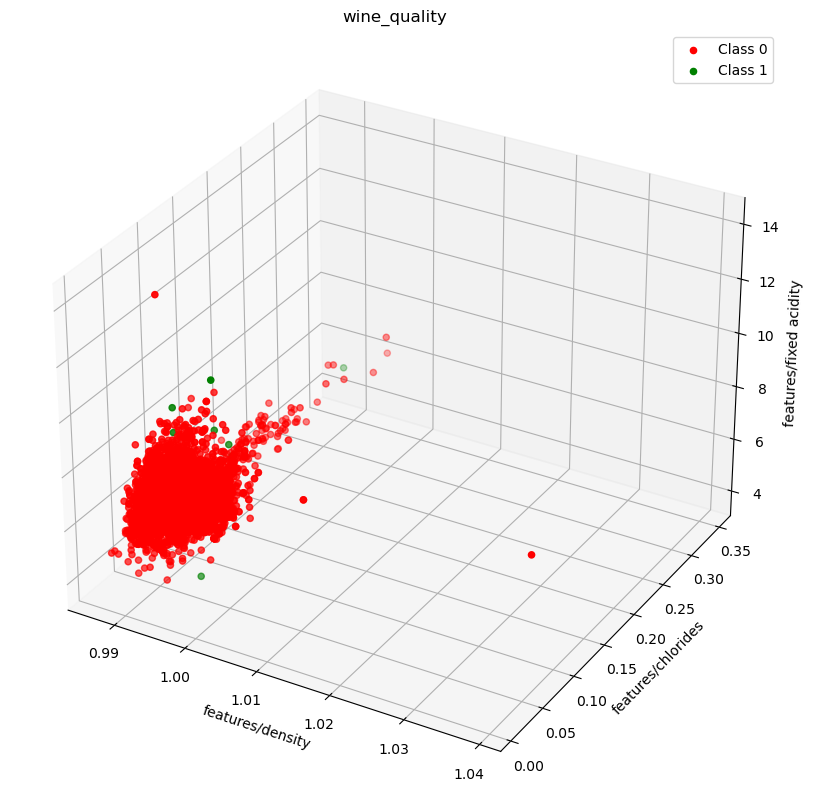

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,10)) 
ax = plt.axes(projection='3d')

colors = ['red', 'green']
classes = df[c].unique()
for i, k in enumerate(classes):
    data = df[df[c] == k]
    ax.scatter(data[a], data[b], data[d], c=colors[i], label=f'Class {k}')
ax.set_xlabel(a)
ax.set_ylabel(b)
ax.set_zlabel(d)
ax.legend()
ax.set_title(name)
plt.show()

9.	Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.

In [24]:
from sklearn.preprocessing import LabelEncoder
ds = tfds.load(name, split='train')
data = tfds.as_dataframe(ds)
le = LabelEncoder()
data[c] = le.fit_transform(data[c])
X_train, X_test, y_train, y_test = train_test_split(data.drop(c,axis=1).values, data[c].values, test_size=0.2, random_state=42)

In [25]:
def to_one_hot(labels, dimension=len(data[c].unique())):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)
y_train.shape, y_test.shape

((3918, 7), (980, 7))

In [26]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)

model = keras.Sequential([
    feature_normalizer,
    keras.layers.Dense(2**n, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(2**n, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(2**n, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(len(data[c].unique()), activation='softmax')
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    # уровень выводимой информации
                    verbose=1,
                    # проверка (валидация) на 20% обучающих данных
                    validation_split = 0.2)

Epoch 1/100
98/98 [==============================] - 2s 12ms/step - loss: 1.3378 - accuracy: 0.4317 - val_loss: 1.1930 - val_accuracy: 0.4617
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 1.2612 - accuracy: 0.4576 - val_loss: 1.1772 - val_accuracy: 0.4617
Epoch 3/100
98/98 [==============================] - 0s 5ms/step - loss: 1.2351 - accuracy: 0.4665 - val_loss: 1.2414 - val_accuracy: 0.4184
Epoch 4/100
98/98 [==============================] - 1s 5ms/step - loss: 1.2263 - accuracy: 0.4703 - val_loss: 1.2325 - val_accuracy: 0.3724
Epoch 5/100
98/98 [==============================] - 0s 5ms/step - loss: 1.2127 - accuracy: 0.4636 - val_loss: 1.1851 - val_accuracy: 0.4643
Epoch 6/100
98/98 [==============================] - 0s 5ms/step - loss: 1.2109 - accuracy: 0.4659 - val_loss: 1.1776 - val_accuracy: 0.4719
Epoch 7/100
98/98 [==============================] - 0s 4ms/step - loss: 1.2020 - accuracy: 0.4719 - val_loss: 1.1996 - val_accuracy: 0.4413
Epoch 8/100


Epoch 59/100
98/98 [==============================] - 0s 3ms/step - loss: 1.0724 - accuracy: 0.5306 - val_loss: 1.1562 - val_accuracy: 0.4898
Epoch 60/100
98/98 [==============================] - 0s 3ms/step - loss: 1.0708 - accuracy: 0.5172 - val_loss: 1.1201 - val_accuracy: 0.5191
Epoch 61/100
98/98 [==============================] - 0s 3ms/step - loss: 1.0699 - accuracy: 0.5265 - val_loss: 1.0953 - val_accuracy: 0.5051
Epoch 62/100
98/98 [==============================] - 0s 4ms/step - loss: 1.0754 - accuracy: 0.5156 - val_loss: 1.0770 - val_accuracy: 0.5230
Epoch 63/100
98/98 [==============================] - 0s 3ms/step - loss: 1.0627 - accuracy: 0.5262 - val_loss: 1.0959 - val_accuracy: 0.5102
Epoch 64/100
98/98 [==============================] - 0s 3ms/step - loss: 1.0692 - accuracy: 0.5233 - val_loss: 1.0828 - val_accuracy: 0.5255
Epoch 65/100
98/98 [==============================] - 0s 3ms/step - loss: 1.0690 - accuracy: 0.5246 - val_loss: 1.1064 - val_accuracy: 0.4656
Epoch 

10.	Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

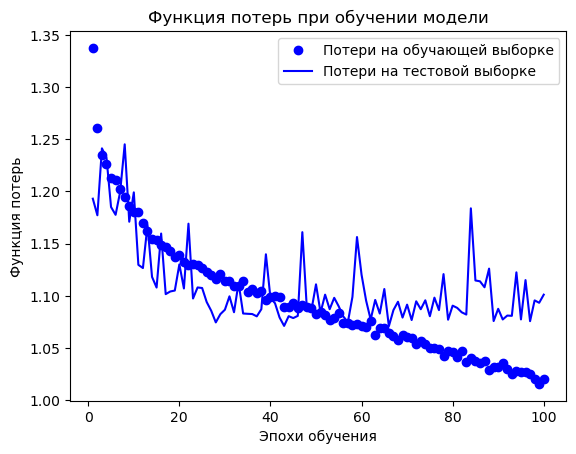

In [27]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "b", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();